In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
df = pd.read_csv('low_high_ts_df.csv')

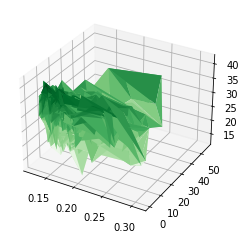

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(df.NDVI_low_skill,df.Precip_low_skill,df.Temp_low_skill, cmap='Greens')

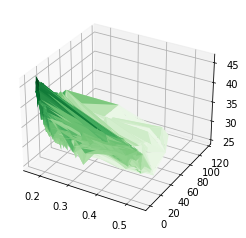

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(df.NDVI_high_skill,df.Precip_high_skill,df.Temp_high_skill, cmap='Greens')

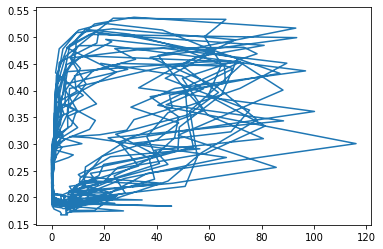

In [27]:
lag = 1
plt.plot(df.Precip_high_skill[:-lag],df.NDVI_high_skill[lag:])

## Let's try to do this in Plotly 

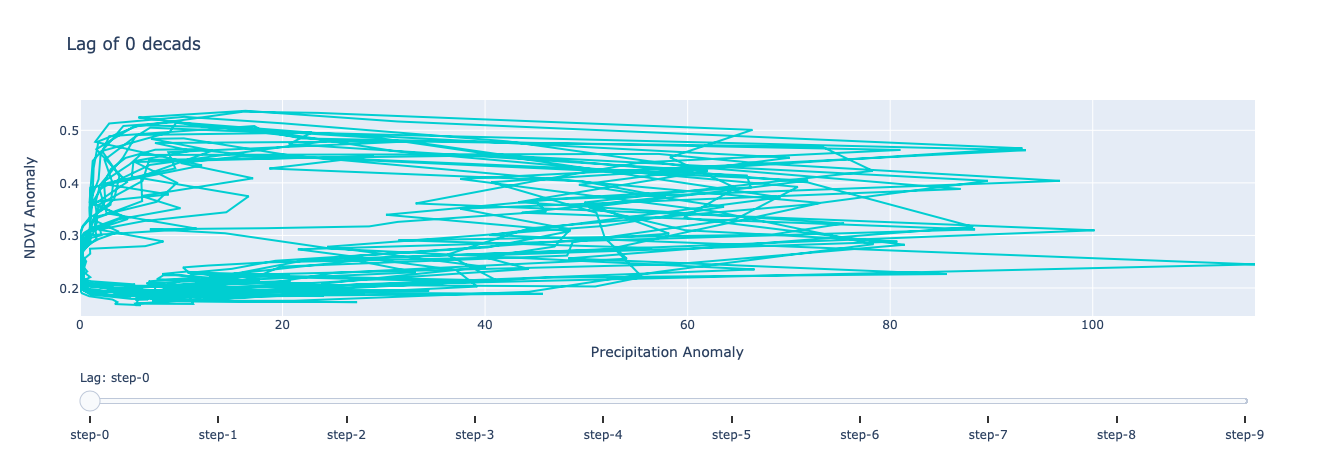

In [28]:
import plotly.graph_objects as go
# Import the necessaries libraries
#import plotly.offline as pyo
# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import numpy as np

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=2),
            name="lag = 0 decads",
            x=df.Precip_high_skill,
            y=df.NDVI_high_skill))

# Add traces, one for each slider step
for lag in np.arange(1, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=2),
            name="lag = " + str(lag) + ' decads',
            x=df.Precip_high_skill[:-lag],
            y=df.NDVI_high_skill[lag:]))

# Make 1st trace visible
fig.data[0].visible = True
fig.update_layout(title = "Lag of 0 decads",
                  xaxis_title='Precipitation Anomaly',
                  yaxis_title='NDVI Anomaly')

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Lag of " + str(i) + " decads"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Lag: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()


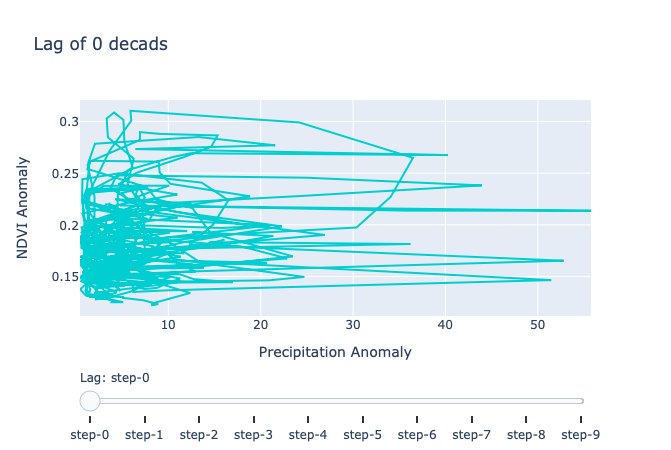

In [24]:

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=2),
            name="lag = 0 decads",
            x=df.Precip_low_skill,
            y=df.NDVI_low_skill))

# Add traces, one for each slider step
for lag in np.arange(1, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=2),
            name="lag = " + str(lag) + ' decads',
            x=df.Precip_low_skill[:-lag],
            y=df.NDVI_low_skill[lag:]))

# Make 1st trace visible
fig.data[0].visible = True
fig.update_layout(title = "Lag of 0 decads",
                  xaxis_title='Precipitation Anomaly',
                  yaxis_title='NDVI Anomaly')

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Lag of " + str(i) + " decads"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Lag: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()



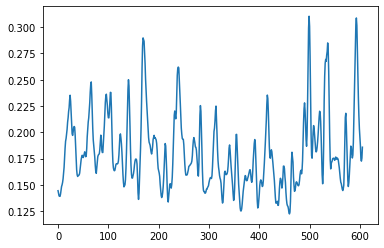

In [33]:
plt.plot(df.NDVI_low_skill)

In [13]:
df.Precip_high_skill[:]

0      30.802542
1      46.089069
2      85.599159
3      48.210403
4      88.186401
         ...    
601     4.376093
602     5.176301
603     5.701899
604     6.247706
605     7.746363
Name: Precip_high_skill, Length: 606, dtype: float64